In [1]:
import numpy             as np
import matplotlib.pyplot as plt

from src.odes_test1_new import ODE
from src.rates          import initialise_abs, calculate_rates
from scipy.integrate    import solve_ivp
from astropy            import constants

In [2]:
CO = 72-1
H2O = 37-1

x=[5,
28,
34,
36,
41,
55,
59,
64,
71,
73,
126,
132,
198,
204,
207,
281,
331]



In [3]:
## Physical constants
kB = constants.k_B.cgs.value          ## Boltzmann constant [erg/K]
mH = constants.u.to('g').value        ## mass H atom = atomic mass unit [g]

## Other constants
pi = np.pi

#-- GRAIN PARAMETERS FOR H2 FORMATION AND CR IONISATION
rGr    = 1.0E-5    ## grain radius [cm]
nGr    = 1.5e-12   ## grain number density/H2 (assuming gas/dust = 200, rho = 3.5 g/cm^3)
w      = 0.5       ## grain albedo
AUV_AV = 4.65
stckH  = 0.3       ## sticking coefficient for H atoms

In [4]:
## input values physics
ρ  = 1e-6
T  = 2500.
δ  = 1.
Av = 1.

## input chemistry
chemtype = 'C'

## calculate H accretion on dust
Haccr = stckH *pi*(rGr**2.0)*ρ*nGr*(8.0*kB*T/(pi*mH))**0.5

In [5]:
n, n_consv = initialise_abs(chemtype)
ndot       = np.zeros(len(n))
X          = np.zeros(len(n_consv))
k          = calculate_rates(T, δ, Av)

5
28
34
36
41
55
59
64
71
73
126
132
198
204
207
281
331


In [6]:
t=0.0
# ODE(t, n, n_consv, ndot, X, k, ρ, Haccr)

In [20]:
# def f(t, y, a, b):

#     return -a*y + b

Δt = 1.0e-4
# y0 = np.random.randn(2)

# a = 1.3
# b = 5.2

solution = solve_ivp(
    fun          = ODE,
    t_span       = [0.0, Δt],
    y0           = n,
    method       = 'BDF',   ## zoals DVODE
    args         = (n_consv, ndot, X, k, ρ, Haccr),
    dense_output = False    ## if True: returns interpolation function
)

assert solution['status'] == 0

ys = solution['y']
ts = solution['t']

print(solution['message'])

The solver successfully reached the end of the integration interval.


In [8]:
ys.shape[0]

466

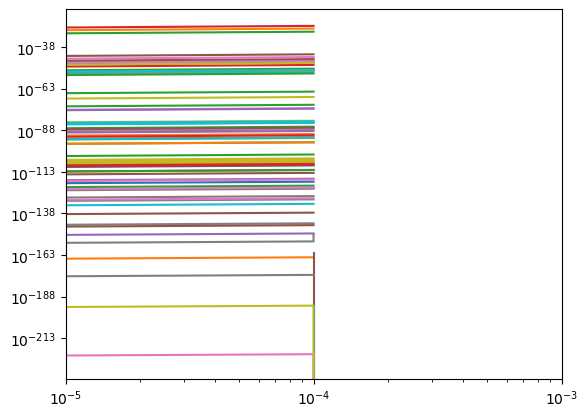

In [21]:
for i in range(ys.shape[0]):
    plt.plot(ts, -ys[i])
# for j in x:
#     plt.plot(ts, ys[j],'k')
plt.yscale('log')
# plt.ylim((1.0e-20, 1.0e+0))
plt.xscale('log')


In [11]:
len(ts)

10

In [12]:
import re

def minus_one(match):
    '''
    Helper function that is used in the regular expression substitution.
    '''
    # Extract the mached string from the matched object
    match = match.group(0)
    # remove square brackets
    match = match[1:-1]
    # Cast to integer
    match = int(match)    
    # Minus one
    match -= 1
    # Add brackets again
    match = f'[{match}]'
    # Return result
    return match

# Read the original ODE file
with open('src/odes_test1.py', 'r') as file:
    content = file.read()

# Substitute every number between square brackets with that number minus one
content_new = re.sub('\[\d+\]', minus_one, content)

# Write the new ODE file
with open('./src/odes_test1_new.py', 'w') as file:
    file.write(content_new)

FileNotFoundError: [Errno 2] No such file or directory: 'src/odes_test1.py'